# 2.3 读取遥感影像的信息

## 2.3.1 打开已有的GeoTIF文件

下面我们试着读取一个GeoTiff文件的信息。第一步就是打开一个数据集。

In [12]:
from osgeo import gdal
from osgeo import ogr

In [13]:
dataset = gdal.Open("./gdata/geotiff_file.tif")
print(dataset)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001EED390C840> >


既然已经将一个GeoTIFF文件打开为一个GDAL可操作的对象， 下面来看一下都能对其进行怎样的操作。

Python提供了 dir() 内省函数， 可以快速查看一下当前对象可用的操作：

dir() 函数可能是 Python 自省机制中最著名的部分了。它可以返回传递给它的任何对象的属性名称经过排序的列表。 如果不指定对象，则 dir() 返回当前作用域中的名称。

In [14]:
dir(dataset)[:10] + ['... ...'] + dir(dataset)[-3:]

['AbortSQL',
 'AddBand',
 'AddFieldDomain',
 'AdviseRead',
 'BeginAsyncReader',
 'BuildOverviews',
 'ClearStatistics',
 'CommitTransaction',
 'CopyLayer',
 'CreateLayer',
 '... ...',
 '__weakref__',
 'this',
 'thisown']

下面看一下如何获取文件的一些基本信息，需要用到下面的一些函数与属性。

dataset.GetDescription() 获得栅格的描述信息

dataset.RasterCount 获得栅格数据集的波段数

dataset.RasterXSize 栅格数据的宽度(X方向上的像素个数)

dataset.RasterYSize 栅格数据的高度(Y方向上的像素个数)

dataset.GetGeoTransform() 栅格数据的六参数。

GetProjection() 栅格数据的投影

## 2.3.2  读取影像的元数据 

从元数据的作用来看，它更多地是为工程服务的。 客观地说，GDAL对元数据的支持并不好， 它并没有直接的元数据处理接口， 更没有实现元数据的相关标准。 但是，GDAL已经提供了足够方便的函数，可以读取影像的一些信息， 从而方便对数据进行处理。 GDAL一般是以字典的形式对元数据进行组织的， 但是对于不同的栅格数据类型，元数据的类型与键值可能都不一样。

目前， 国际上对空间元数据标准内容进行研究的组织主要有三个，分别是欧洲标准化委员会(CEN/TC 287)、 美国联邦地理数据委员会(FGDC)和国际标准化组织地理信息/地球信息技术委员会(ISO/TC 211)。

如果要进行元数据处理，可以考虑将元数据信息写入到XML文件中。 这个问题扩展开来就不是本书关心的内容的，在此就不再多说了。

我们先来看一下最常用的GeoTIFF文件的元数据信息。 GDAL可以作为数据集级别的元数据来处理下面的基本的TIFF标志。

TIFFTAG_DOCUMENTNAME

TIFFTAG_IMAGEDESCRIPTION

TIFFTAG_SOFTWARE

TIFFTAG_DATETIME

TIFFTAG_ARTIST

TIFFTAG_HOSTCOMPUTER

TIFFTAG_COPYRIGHT

TIFFTAG_XRESOLUTION

TIFFTAG_YRESOLUTION

TIFFTAG_RESOLUTIONUNIT

TIFFTAG_MINSAMPLEVALUE (read only)

TIFFTAG_MAXSAMPLEVALUE (read only)

In [15]:
dataset.GetMetadata()

{'AREA_OR_POINT': 'Area', 'PyramidResamplingType': 'NEAREST'}

### GetDescription() 获得栅格的描述信息

In [16]:
dataset.GetDescription()

'./gdata/geotiff_file.tif'

### 获取栅格数目

In [17]:
dataset.RasterCount

3

再看一个MODIS L1B数据：

In [18]:
mds = gdal.Open("./gdata/MOD09A1.A2009193.h28v06.005.2009203125525.hdf")

In [19]:
mds.RasterCount

0

运行结果居然是0。这意味着当前的数据集 dataset 中的栅格数目是0。 实际上，MODISL1B的数据格式是HDF格式的， 它的数据是以子数据集组织的， 要获取其相关的数据的信息， 需要继续访问其子数据集。

### 影像大小
栅格数据的大小指出了影像以像元为单位的宽度与高度。

In [20]:
dataset.RasterXSize,dataset.RasterYSize

(1500, 900)

### 获得空间参考
下面看一下如果从栅格数据集中获取其投影与空间参考信息。 更多的关于投影与空间参考的讨论，会在后面章节介绍。

GetGeoTransform() 地理仿射变换参数。

对于遥感影像来说，它需要在地理空间中进行定位。 在GDAL中，这有两种方式，其中一种是使用六个参数坐标转换模型。 这个模型的具体实现在不同的软件中是不一样的。 在GDAL中，这六个参数包括左上角坐标，像元X、Y方向大小，旋转等信息。 要注意，Y方向的像元大小为负值。

In [21]:
dataset.GetGeoTransform()

(1868454.913, 30.0, 0.0, 5353126.266, 0.0, -30.0)

### 获得投影信息
使用 GetProjection() 函数，可以比较容易地获取数据集的投影信息， 但是对于什么是地图投影，以及如何在GDAL中实现，就不是这么容易了。

In [22]:
dataset.GetProjection()

'PROJCS["Albers_Beijing54",GEOGCS["Unknown datum based upon the Krassowsky 1940 ellipsoid",DATUM["Not_specified_based_on_Krassowsky_1940_ellipsoid",SPHEROID["Krassowsky 1940",6378245,298.3,AUTHORITY["EPSG","7024"]],AUTHORITY["EPSG","6024"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",105],PARAMETER["standard_parallel_1",25],PARAMETER["standard_parallel_2",47],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

## 2.3.3 使用GDAL获取栅格数据波段信息 
上面我们介绍了针对数据集操作的主要函数。 但是如果需要了解栅格数据的更多信息，我们就需要看一下遥感图像处理中更常用到的波段操作的函数。

### 获取数据集的波段

In [23]:
from osgeo import gdal
dataset = gdal.Open('./gdata/lu75c.tif')
dataset.RasterCount

1

In [24]:
band = dataset.GetRasterBand(1)

### 查看波段的基本信息

In [25]:
dir(band)[:6] + ['... ...'] + dir(band)[-3:]

['AdviseRead',
 'AsMDArray',
 'Checksum',
 'ComputeBandStats',
 'ComputeRasterMinMax',
 'ComputeStatistics',
 '... ...',
 '__weakref__',
 'this',
 'thisown']

看一下常用的操作。这些也是用来获取波段的属性信息

### 获取波段大小

In [26]:
band.XSize, band.YSize, band.DataType

(6122, 4669, 3)

执行以上代码得到了波段图像的宽和高（像元为单位）。 对于我们所使用的影像， 这个与 dataset 中使用 RasterXSize() 与 RasterYSize() 获取的值一致。DataType是图像中实际数值的数据类型，表示8位无符整型。 

### 获取波段数据的属性

In [27]:
print(band.GetNoDataValue())

None


In [28]:
print(band.GetMaximum())

None


In [29]:
print(band.GetMinimum())

None


In [30]:
band.ComputeRasterMinMax()

(-1.0, 66.0)

Maximum 是表示在本波段数值中最大的值，当然 Minimum 就是表示本波段中最小的值。 通过运行结果，我们可以看到在一开始RasterXSize()和RasterYSize()都没有值。 因为对于文件格式不会有固有的最大最小值。 所以我们可以通过函数ComputeRasterMinMax() 计算得到。 注意！这里的最大最小值不包括“无意义值”！ 也就是上面显示的 NoDataValue 。

## 2.3.4  其他数据格式格式

### 使用GDAL读取ENVI数据格式
ENVI栅格文件格式

ENVI使用的是通用栅格数据格式，包含一个简单的二进制文件（a simple flat binary）和一个相关的ASCII（文本）的头文件。这也保证了单个ENVI栅格文件没有大小上限。

（1）头文件

ENVI头文件包含用于读取图像数据文件的信息，它通常创建于一个数据文件第一次被ENVI读取时。单独的ENVI头文本文件提供关于图像尺寸、 嵌入的头文件（若存在）、数据格式及其它相关信息。所需信息通过交互式输入，或自动地用“文件吸取”创建，并且以后可以编辑修改。 使用者可以在ENVI之外使用一个文本编辑器生成一个ENVI头文件。

（2）数据文件

通用栅格数据都会存储为二进制的字节流，通常它将以BSQ（band sequential，按波段顺序储存）、BIP（band interleaved by pixel，按波段像元交叉储存）或者BIL（band interleaved by line，按波段行交叉储存）的方式进行存储。

ENVI栅格文件必须包含着两个文件，其中头文件的后缀名为：.hdr，数据文件的后缀随意，甚至可以不带后缀名。 这两个文件是通过文件名来关联，即数据文件和头文件名称一致。

### GDAL读取HDF数据格式
由于modis卫星数据跟我们经常遇到的geotif数据组织方式不一样，读取的时候一定要特别注意。geotif数据，一般是一个文件，包含了多个波段的数据； 而modis呢，一个文件包含了多各SUBDATASETSGDAL， 每个SUBDATASETS又包含多个波段数据。 另外默认编译的GDAL并不包含对MODIS数据支持， 需要单独下载针对HDF4，HDF5的源码，再修改下make.opt文件， 这时再编译GDAL，就支持modis数据的读写了。

## 一个例子

影像文件名: ./gdata/geotiff_file.tif
投影信息: PROJCS["Albers_Beijing54",GEOGCS["Unknown datum based upon the Krassowsky 1940 ellipsoid",DATUM["Not_specified_based_on_Krassowsky_1940_ellipsoid",SPHEROID["Krassowsky 1940",6378245,298.3,AUTHORITY["EPSG","7024"]],AUTHORITY["EPSG","6024"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",105],PARAMETER["standard_parallel_1",25],PARAMETER["standard_parallel_2",47],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
仿射变换系数: (1868454.913, 30.0, 0.0, 5353126.266, 0.0, -30.0)
波段数: 3


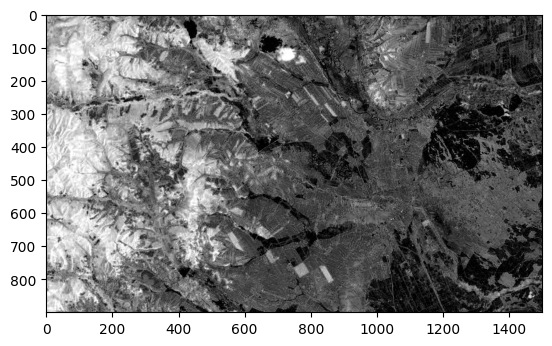

In [31]:
# %matplotlib widget
from osgeo import gdal
import matplotlib.pyplot as plt

# 打开影像文件
dataset = gdal.Open('./gdata/geotiff_file.tif')

# 获取影像文件信息
print('影像文件名:', dataset.GetDescription())
print('投影信息:', dataset.GetProjection())
print('仿射变换系数:', dataset.GetGeoTransform())
print('波段数:', dataset.RasterCount)

# 获取第一波段数据并显示
band = dataset.GetRasterBand(1)
data = band.ReadAsArray()
plt.imshow(data, cmap='gray')
plt.show()

# 关闭影像文件
dataset = None


以下是一个示例程序，用于读取并显示影像信息，以及获取波段信息：

In [32]:
from osgeo import gdal

# 打开影像文件
dataset = gdal.Open("./gdata/geotiff_file.tif")

# 获取影像的元数据
metadata = dataset.GetMetadata()

# 打印元数据
print("影像元数据：\n", metadata)

# 获取影像的宽度和高度
width = dataset.RasterXSize
height = dataset.RasterYSize

# 获取影像的波段数
num_bands = dataset.RasterCount

# 打印影像的宽度、高度和波段数
print("影像宽度：", width)
print("影像高度：", height)
print("影像波段数：", num_bands)

# 获取第一个波段
band = dataset.GetRasterBand(1)

# 获取波段的元数据
band_metadata = band.GetMetadata()

# 打印波段的元数据
print("波段元数据：\n", band_metadata)

# 获取波段的数据类型
data_type = gdal.GetDataTypeName(band.DataType)

# 打印波段的数据类型
print("波段数据类型：", data_type)

# 获取波段的统计信息：最小值为，最大值为，平均值为，标准差为
statistics = band.GetStatistics(True, True)

# 打印波段的统计信息
print("波段统计信息：", statistics)

# 关闭影像文件
dataset = None


影像元数据：
 {'AREA_OR_POINT': 'Area', 'PyramidResamplingType': 'NEAREST'}
影像宽度： 1500
影像高度： 900
影像波段数： 3
波段元数据：
 {'STATISTICS_APPROXIMATE': 'YES', 'STATISTICS_MAXIMUM': '255', 'STATISTICS_MEAN': '97.26861037037', 'STATISTICS_MINIMUM': '0', 'STATISTICS_STDDEV': '62.103354924781', 'STATISTICS_VALID_PERCENT': '100'}
波段数据类型： Byte
波段统计信息： [0.0, 255.0, 97.26861037037, 62.103354924781]


In [33]:
from osgeo import gdal

# 打开图像文件
dataset = gdal.Open('./gdata/geotiff_file.tif')

# 获取图像文件的基本信息
width = dataset.RasterXSize
height = dataset.RasterYSize
num_bands = dataset.RasterCount
projection = dataset.GetProjection()
geotransform = dataset.GetGeoTransform()

print('图像宽度:', width)
print('图像高度:', height)
print('波段数量:', num_bands)
print('投影信息:', projection)
print('地理变换参数:', geotransform)

# 统计各波段的详细信息
for i in range(1, num_bands+1):
    band = dataset.GetRasterBand(i)
    band_type = gdal.GetDataTypeName(band.DataType)
    band_min, band_max, band_mean, band_stddev = band.GetStatistics(True, True)
    band_histogram = band.GetHistogram()
    
    print('波段{}信息:'.format(i))
    print('数据类型:', band_type)
    print('最小值:', band_min)
    print('最大值:', band_max)
    print('平均值:', band_mean)
    print('标准差:', band_stddev)
    print('直方图:', band_histogram)

# 关闭数据集
dataset = None


图像宽度: 1500
图像高度: 900
波段数量: 3
投影信息: PROJCS["Albers_Beijing54",GEOGCS["Unknown datum based upon the Krassowsky 1940 ellipsoid",DATUM["Not_specified_based_on_Krassowsky_1940_ellipsoid",SPHEROID["Krassowsky 1940",6378245,298.3,AUTHORITY["EPSG","7024"]],AUTHORITY["EPSG","6024"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",0],PARAMETER["longitude_of_center",105],PARAMETER["standard_parallel_1",25],PARAMETER["standard_parallel_2",47],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
地理变换参数: (1868454.913, 30.0, 0.0, 5353126.266, 0.0, -30.0)
波段1信息:
数据类型: Byte
最小值: 0.0
最大值: 255.0
平均值: 97.26861037037
标准差: 62.103354924781
直方图: [1463, 132, 114, 114, 130, 128, 134, 129, 141, 131, 135, 114, 116, 143, 101, 151, 137, 117, 115, 114, 147, 148, 136, 129, 132, 139, 141, 144, 143, 159, 114, 153, 148, 137, 169

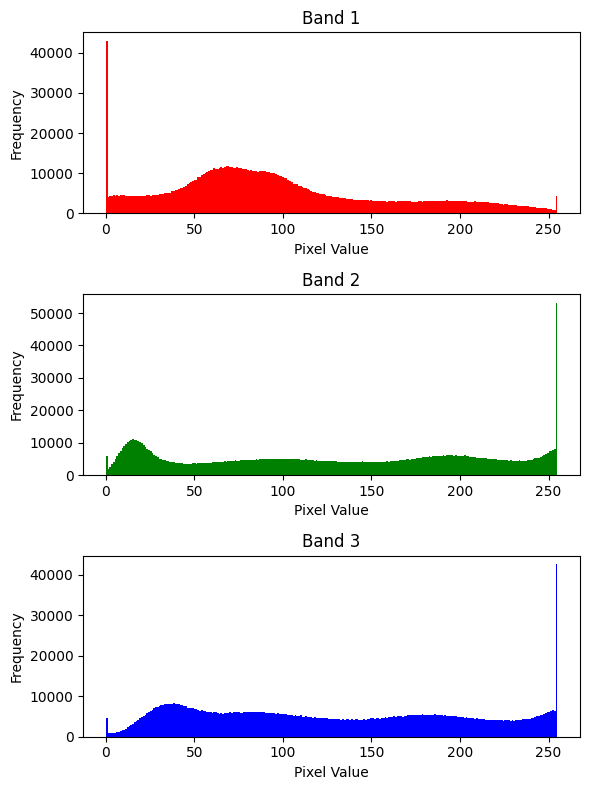

In [37]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

# 打开影像文件
filename = './gdata/geotiff_file.tif'
dataset = gdal.Open(filename)
dataset
# 读取各波段的数据
band1 = dataset.GetRasterBand(1).ReadAsArray().ravel()
band2 = dataset.GetRasterBand(2).ReadAsArray().ravel()
band3 = dataset.GetRasterBand(3).ReadAsArray().ravel()

# 绘制直方图
fig, axes = plt.subplots(3, 1, figsize=(6, 8))
axes[0].hist(band1, bins=256, range=[0, 255], color='red')
axes[0].set_title('Band 1')
axes[0].set_xlabel('Pixel Value')
axes[0].set_ylabel('Frequency')
axes[1].hist(band2, bins=256, range=[0, 255], color='green')
axes[1].set_title('Band 2')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[2].hist(band3, bins=256, range=[0, 255], color='blue')
axes[2].set_title('Band 3')
axes[2].set_xlabel('Pixel Value')
axes[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()
